In [200]:
# Telefon Fiyat Aralığı Belirleme	   

# Amaç : bir telefonun özelliklerini dikkate alarak satılabileceği fiyat seviyesini belirlemek.

In [201]:
# Telephone Price Range Determination

# İş Problemi :

# Özellikleri belirtilen telefonların satılabileceği fiyat seviyelerini
# bir makine öğrenmesi modeli ile doğru tahmin edebilir misiniz ?

# 2000 gözlem ve 20 sayısal bağımsız değişkenden oluşmaktadır. Hedef değişken
# "price_range" belirtilmiş olup ;

# 0 : Ucuz
# 1 : Orta
# 2 : Pahalı
# 3 : Çok Pahalı


# Değişkenler
# • battery_power = Bir pilin  depolayabileceği toplam enerji ( mAh )
# • blue = Bluetooth var mı ? yok mu ?  1: Var , 0: Yok
# • clock_speed = Mikroişlemci hızı
# • dual_sim = Çift sim kartı destekliyor mu ?  1:  Destekler , 0: Desteklemez
# • fc = Ön kamera mega pikseli
# • four_g = 4G var mı ?  yok mu ?   1: Var, 0: Yok
# • int_memory = Harici Hafıza ( GB )
# • m_dep = Telefon  Derinliği ( CM )
# • mobile_wt = Telefon Ağırlığı
# • n_cores = Çekirdek Sayısı
# • pc = İlk kameranın mega pikseli
# * px_height = Piksel Çözünürlük Yüksekliği
# • px_width = Piksel Çözünürlük Genişliği
# • ram = RAM ( MB )
# • sc_h = Cep telefonunun cm cinsinden ekran yüksekliği
# • sc_w = Cep telefonunun cm cinsinden ekran genişliği
# • talk_time = Tek bir pil şarjının dayanacağı en uzun süre
# • three_g = 3G var mı ?  yok mu ?  1: Var, 0: Yok
# • touch_screen = Ekran dokunmatik mi ? değil mi ?  | 1: Dokunmantik, 0: Değil
# • wifi = Wifi var mı ? yok mu ? | 1: Var, 0: Yok
# • price_range = Hedef değişken.  3: Çok Pahalı, 2: Pahalı, 1: Orta, 0: Ucuz

In [202]:
# Aşamalar :

# 1. Data Preprocessing
# 2. Exploratory Data Analysis
# 3. Decision Tree
# 4. Gradient Boosting
# 5. Random Forest
# 6. SVM
# 7. En başarılı model olan SVM'nin sınıflandırma metrikleri ve Karmaşıklık Matrisinin Heatmap fonksiyonu ile çizilmesi
# 8. Her model için en iyi sınıflandırma başarısını bir grafik üzerinden gösterimi
# 9. Ram miktarına göre fiyat skalasının belirlenmesi
# 10. İşlemci Çekirdek Sayısı ve Ramin fiyat skalasi uzerindeki etkisi

In [203]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

# **1. Data Preprocessing**
---



In [204]:
df = pd.read_csv('telefon_fiyatlari.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [205]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [206]:
list(df.columns)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [207]:
df.shape

(2000, 21)

In [208]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [210]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [211]:
df.min()

battery_power    501.0
blue               0.0
clock_speed        0.5
dual_sim           0.0
fc                 0.0
four_g             0.0
int_memory         2.0
m_dep              0.1
mobile_wt         80.0
n_cores            1.0
pc                 0.0
px_height          0.0
px_width         500.0
ram              256.0
sc_h               5.0
sc_w               0.0
talk_time          2.0
three_g            0.0
touch_screen       0.0
wifi               0.0
price_range        0.0
dtype: float64

In [212]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [213]:
# Temel analizleri yaptığıma göre kategorik ve numeric değerleri kontrol etmem gerekiyor. Böylelikle daha hoş bir data ortaya çıkartabilirim.
categoricals = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
numericals = df.drop(columns = categoricals).columns
numericals = numericals.drop(['price_range'])

In [214]:
categoricals

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [215]:
numericals

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')

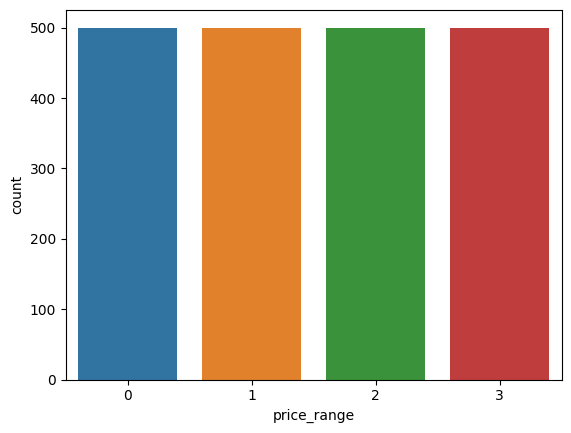

In [216]:
sns.countplot(x="price_range",data = df)
plt.show()

In [217]:
# outputların oranlarına bakalım
100 * (df["price_range"].value_counts() / len(df))

1    25.0
2    25.0
3    25.0
0    25.0
Name: price_range, dtype: float64

In [218]:
df.min() # Tekrar kontrol ediyorum ettiğim kontrolde mantıksız veri olarak px_hight sc_w'nin 0 olabileceğini görüyorum. Yani pixel çözünürlük yükseliği ve
# ekran genişliğinin 0 olamayacağından dolayı bu verilerde düzenleme işlemleri gerçekleştirmem gerekiyor.

battery_power    501.0
blue               0.0
clock_speed        0.5
dual_sim           0.0
fc                 0.0
four_g             0.0
int_memory         2.0
m_dep              0.1
mobile_wt         80.0
n_cores            1.0
pc                 0.0
px_height          0.0
px_width         500.0
ram              256.0
sc_h               5.0
sc_w               0.0
talk_time          2.0
three_g            0.0
touch_screen       0.0
wifi               0.0
price_range        0.0
dtype: float64

In [219]:
df[df['px_height'] == 0]


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [220]:
df_optimize = df.drop(index = [1481,1933])
df_optimize

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [221]:
df[df['sc_w'] == 0]


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,...,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,...,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,...,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,...,1042,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,...,317,1805,2782,7,0,17,1,0,0,2
1920,591,1,0.5,1,1,1,16,0.9,90,6,...,892,1603,3746,5,0,5,1,1,0,3
1946,590,1,1.2,1,0,0,32,0.4,141,6,...,227,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,...,64,745,1503,10,0,13,0,0,0,0


In [222]:
df_optimize= df_optimize.drop(index = df_optimize[df_optimize['sc_w'] == 0].index)
df_optimize

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [223]:
df_optimize

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [224]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


#**2. Exploratory Data Analysis**

---



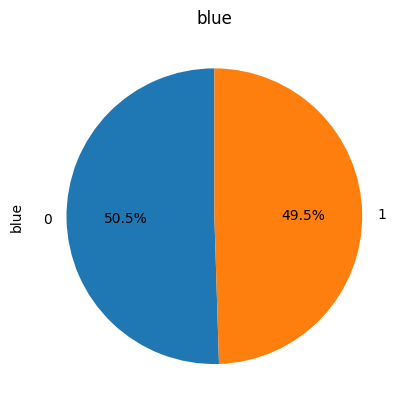

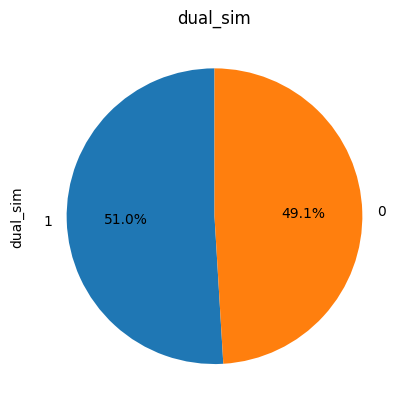

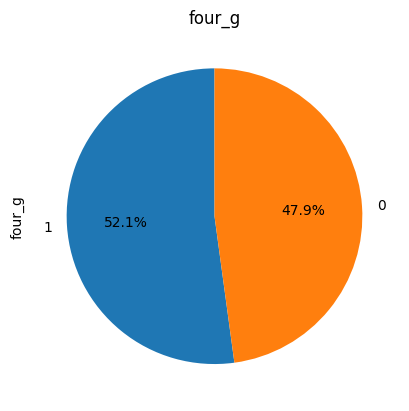

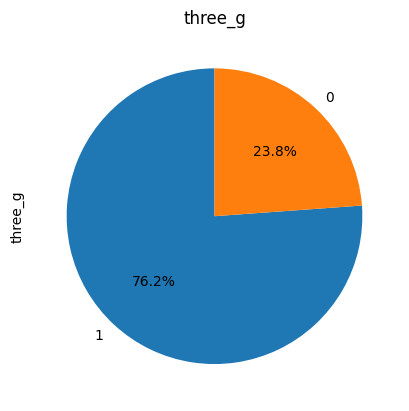

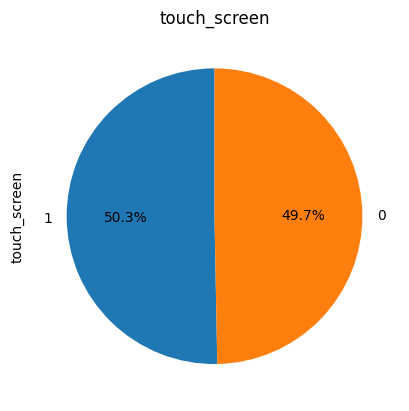

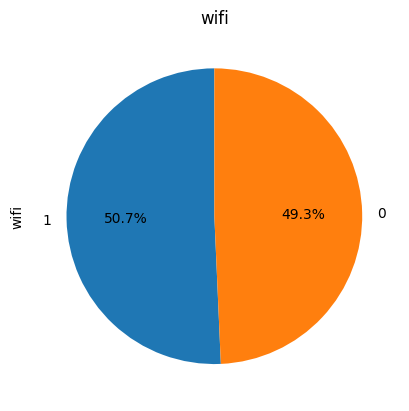

In [225]:
for category in categoricals:
    values = df[category].value_counts()
    values.plot(kind='pie', autopct='%1.1f%%', startangle=90, title=category)
    plt.show()

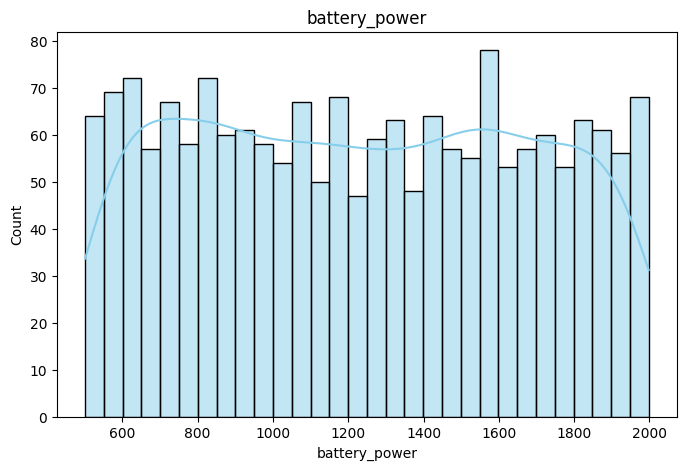

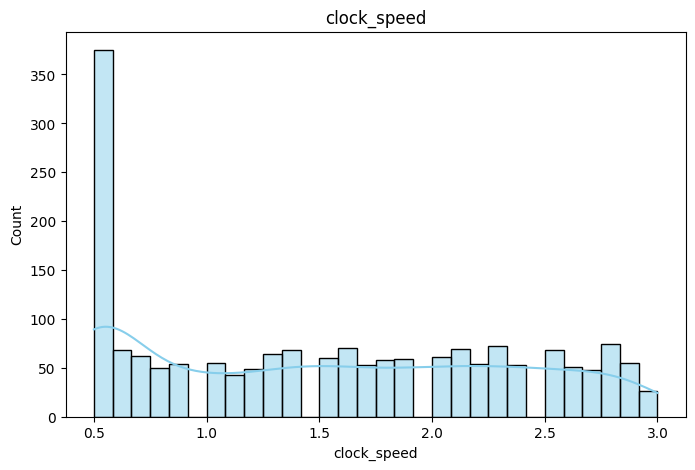

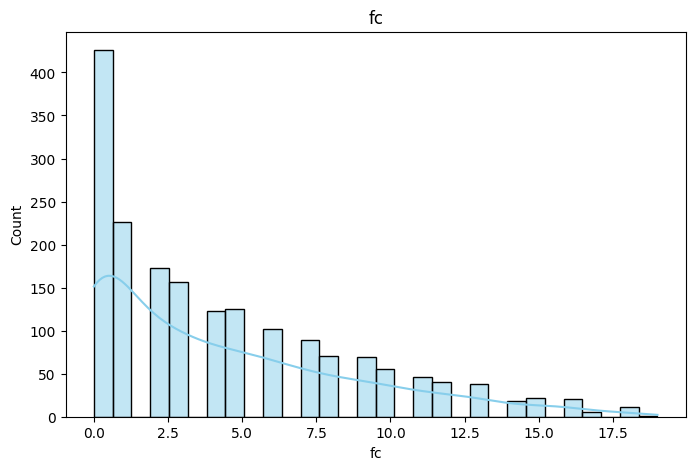

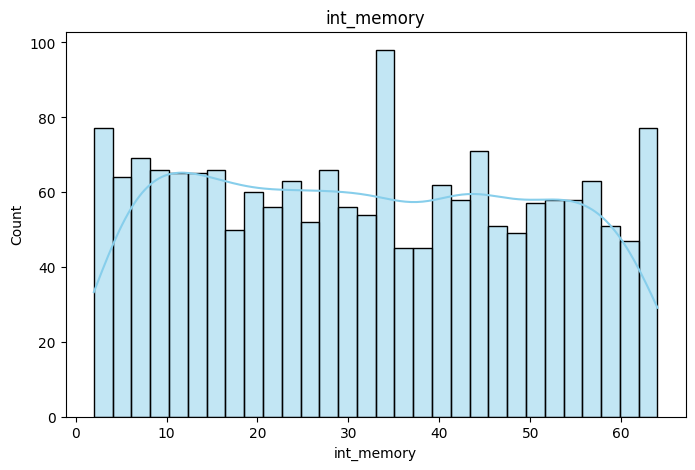

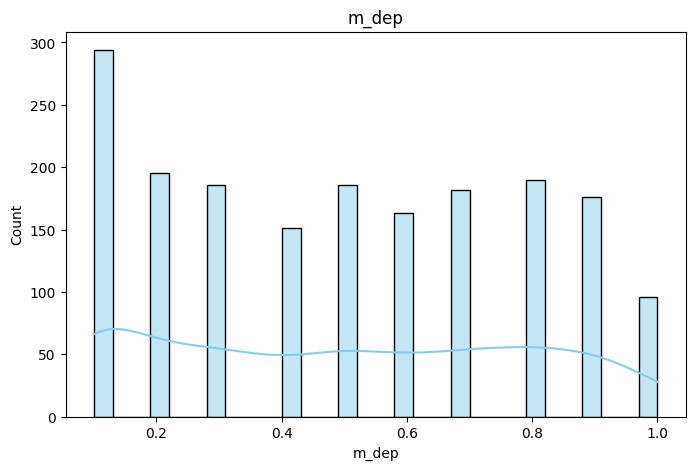

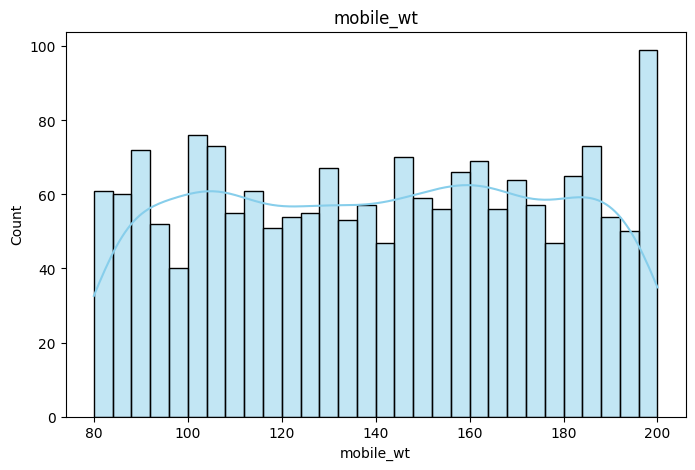

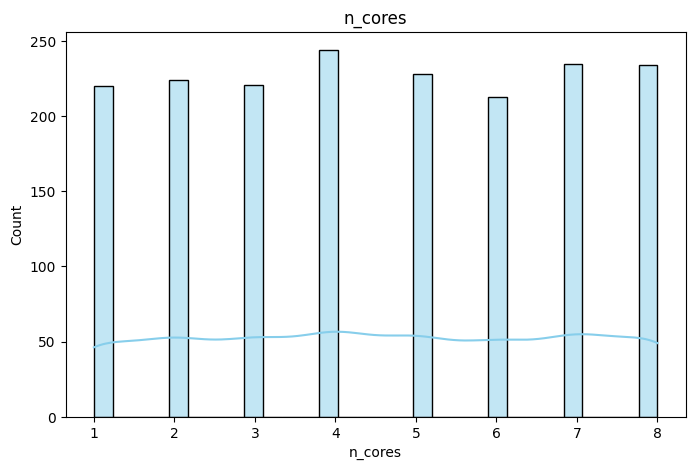

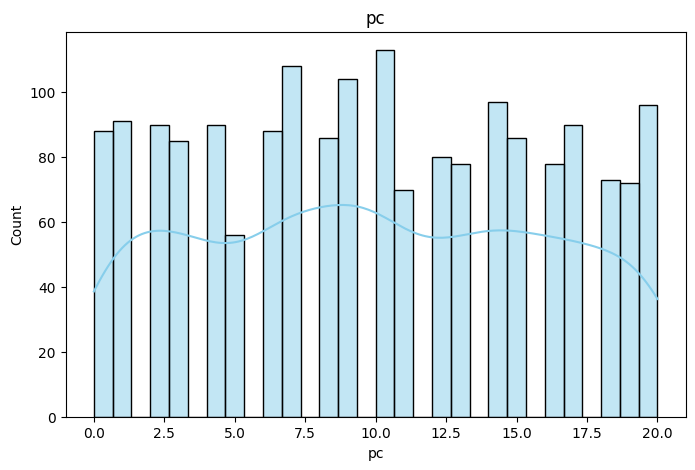

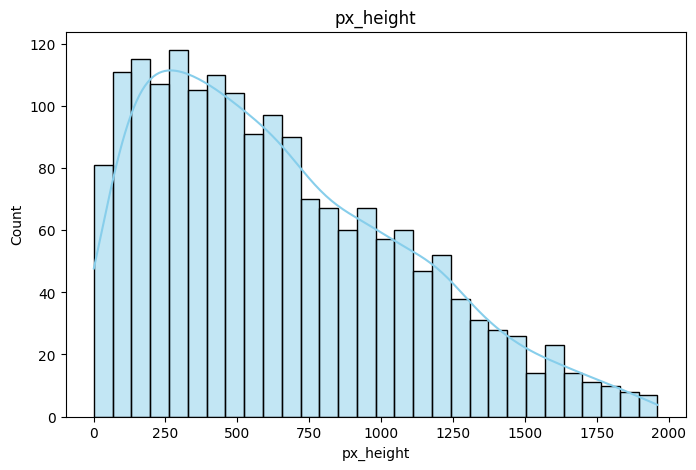

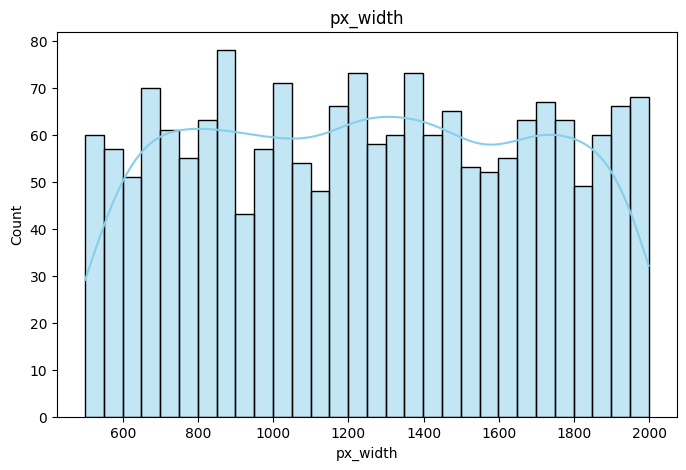

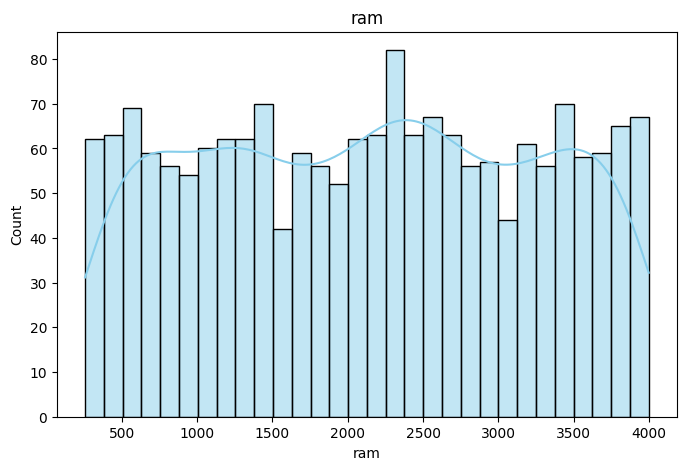

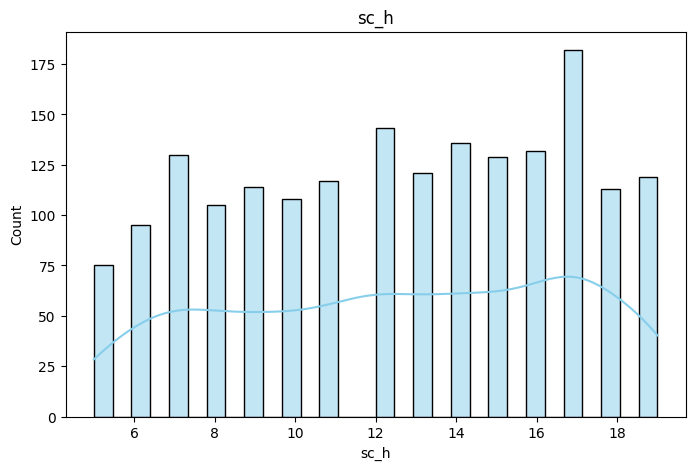

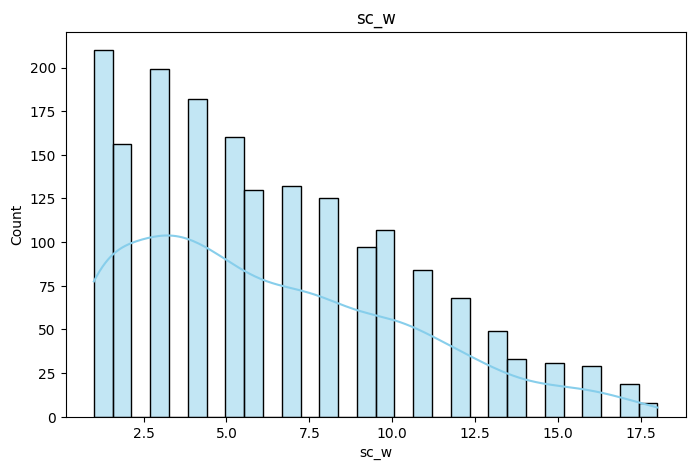

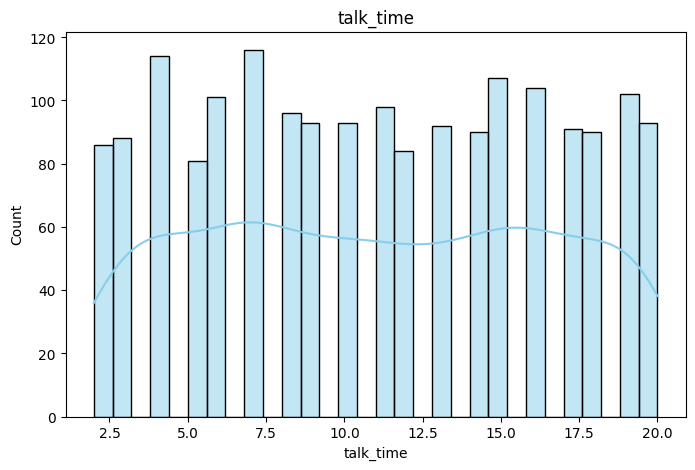

In [226]:
for numeric in numericals:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_optimize[numeric], kde=True, color='skyblue', bins=30)
    plt.title(numeric)
    plt.show()

#**3. Decision Tree Modeli**

---

In [227]:
# Decision Tree Modeli
X = df.drop(columns='price_range').values
Y = df['price_range']
X_optimize = df_optimize.drop(columns='price_range').values
Y_optimize= df_optimize['price_range']

In [228]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_optimize_scaled = scaler.fit_transform(X_optimize)

In [229]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=1)
xc_train, xc_test, yc_train, yc_test = train_test_split(X_optimize_scaled , Y_optimize, test_size=0.2, random_state=1)

# Decision Tree modelini oluşturun
decision_tree_model = DecisionTreeClassifier(random_state=1)

In [230]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 21),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'random_state': [1]
}

In [231]:
from sklearn.model_selection import GridSearchCV
decision_tree_model_grid = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=0, n_jobs=-1)
decision_tree_model_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 21),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 11),
                         'random_state': [1]},
             scoring='accuracy')

In [232]:
print(f"Best parameters: {decision_tree_model_grid.best_params_}")
print(f"Best score: {decision_tree_model_grid.best_score_}")

Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 1}
Best score: 0.85375


In [233]:
decision_tree_model_grid_optimize = GridSearchCV(estimator=decision_tree_model,param_grid=param_grid,scoring='accuracy',cv = 5,verbose = 0,n_jobs=-1)
decision_tree_model_grid_optimize.fit(xc_train,yc_train)
print(f"best parameters : {decision_tree_model_grid_optimize.best_params_}")
print(f"best score : {decision_tree_model_grid_optimize.best_score_}")

best parameters : {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 10, 'random_state': 1}
best score : 0.8391752577319587


#**4. Gradient Boosting Modeli**

---




In [234]:
# Gradient Boosting Modeli
from sklearn.ensemble import GradientBoostingClassifier
X = df.drop(columns='price_range').values
Y = df['price_range']
X_optimize = df_optimize.drop(columns='price_range').values
Y_optimize = df_optimize['price_range']

In [235]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_optimize_scaled = scaler.fit_transform(X_optimize)

In [236]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=1)
xc_train, xc_test, yc_train, yc_test = train_test_split(X_optimize_scaled, Y_optimize, test_size=0.2, random_state=1)

In [237]:
gradient_boosting_model = GradientBoostingClassifier(random_state=1)

In [238]:
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

In [239]:
gradient_boosting_model_grid = GridSearchCV(estimator=gradient_boosting_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=0, n_jobs=-1)
gradient_boosting_model_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 4],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [240]:
print(f"Best parameters: {gradient_boosting_model_grid.best_params_}")
print(f"Best score: {gradient_boosting_model_grid.best_score_}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.91625


In [241]:
gradient_boosting_model_grid_optimize = GridSearchCV(estimator=gradient_boosting_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=0, n_jobs=-1)
gradient_boosting_model_grid_optimize.fit(xc_train, yc_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 4],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [242]:
print(f"Best parameters: {gradient_boosting_model_grid_optimize.best_params_}")
print(f"Best score: {gradient_boosting_model_grid_optimize.best_score_}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8962199312714777


#**5. Random Forest Modeli**

---



In [243]:
# Random Forest Model

X = df.drop(columns='price_range').values
Y = df['price_range']
X_optimize = df_optimize.drop(columns='price_range').values
Y_optimize = df_optimize['price_range']

In [244]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_optimize_scaled = scaler.fit_transform(X_optimize)

In [245]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=1)
xc_train, xc_test, yc_train, yc_test = train_test_split(X_optimize_scaled, Y_optimize, test_size=0.2, random_state=1)

In [246]:
random_forest_model = RandomForestClassifier(random_state=1)


In [247]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


In [248]:
random_forest_model_grid = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=0, n_jobs=-1)
random_forest_model_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'], 'max_depth': [3, 4],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [249]:
print(f"Best parameters: {random_forest_model_grid.best_params_}")
print(f"Best score: {random_forest_model_grid.best_score_}")

Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8237500000000001


In [250]:
random_forest_model_grid_optimize = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=0, n_jobs=-1)
random_forest_model_grid_optimize.fit(xc_train, yc_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'], 'max_depth': [3, 4],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [251]:
print(f"Best parameters: {random_forest_model_grid_optimize.best_params_}")
print(f"Best score: {random_forest_model_grid_optimize.best_score_}")

Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8123711340206186


#**6. SVM Modeli**

---



In [252]:
#SVM
SVM = SVC()
C = [0.2,1,10,100]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
params = {'C':C,'kernel':kernel}

In [253]:
SVM_grid = GridSearchCV(estimator = SVM,param_grid = params,refit= True,verbose = 1,n_jobs=-1)
SVM_grid.fit(x_train,y_train)
print(f"best parameters : {SVM_grid.best_params_}")
print(f"best score : {SVM_grid.best_score_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
best parameters : {'C': 100, 'kernel': 'linear'}
best score : 0.9662499999999999


In [254]:
SVM_grid = GridSearchCV(estimator = SVM,param_grid = params,refit= True,verbose = 1,n_jobs=-1)
SVM_grid.fit(xc_train,yc_train)
print(f"best parameters : {SVM_grid.best_params_}")
print(f"best score : {SVM_grid.best_score_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
best parameters : {'C': 100, 'kernel': 'linear'}
best score : 0.9621993127147765


In [261]:
X = df.drop(columns= 'price_range').values
Y = df['price_range'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [262]:
SVM = SVC(C=100 , kernel = 'linear')
SVM.fit(x_train,y_train)
y_pred = SVM.predict(x_test)

#**7. En başarılı model olan SVM'nin sınıflandırma metrikleri ve Karmaşıklık Matrisinin Heatmap fonksiyonu ile çizilmesi**

---



In [263]:
print(f"accuracy  : {metrics.accuracy_score(y_test,y_pred)} \n")
print(f"classification report :\n {metrics.classification_report(y_test,y_pred)} \n")
# En başarılı model 3 modelimin arasından SVM cıktığı için  burada sınıflandırma metriklerini classification_report ile yazdırdım.
# Şimdi de seaborn ile heatmapini cizeceğim.


accuracy  : 0.9725 

classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       102
           1       0.99      0.94      0.97       104
           2       0.95      0.96      0.95        94
           3       0.96      1.00      0.98       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400
 



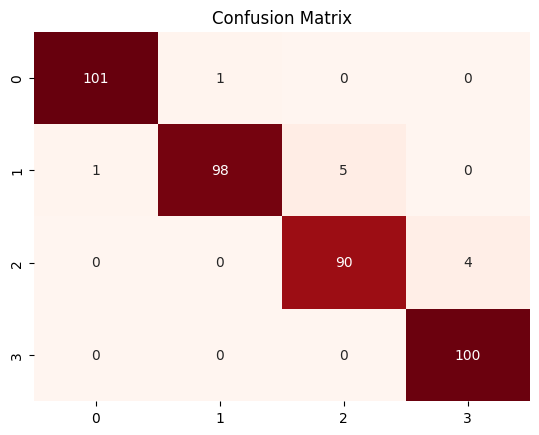

In [264]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.show()

#**8. Her model için en iyi sınıflandırma başarısını bir grafik üzerinden gösterimi**

---



Decision Tree En İyi Skor: 0.8538
Random Forest En İyi Skor: 0.8238
Gradient Boosting En İyi Skor: 0.9163
SVM En İyi Skor: 0.9622


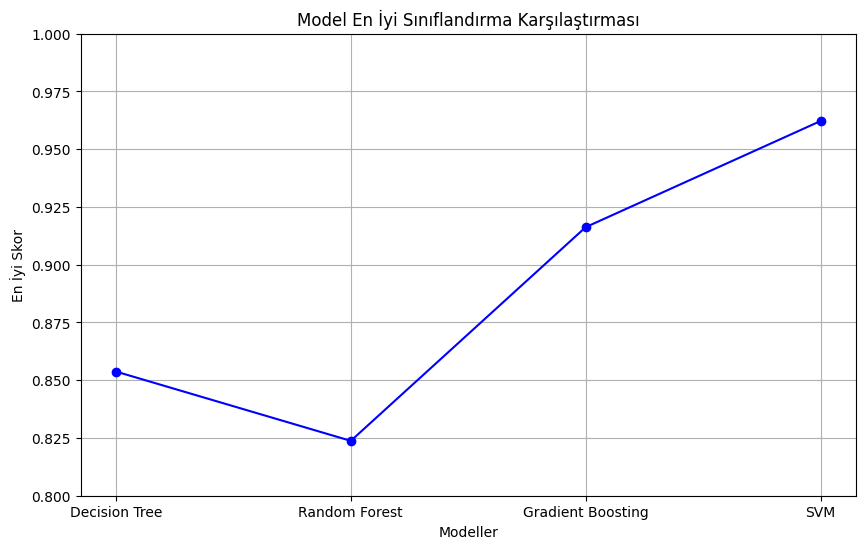

In [265]:
best_score_decision_tree = decision_tree_model_grid.best_score_
best_score_random_forest = random_forest_model_grid.best_score_
best_score_gradient_boosting = gradient_boosting_model_grid.best_score_
best_score_svm = SVM_grid.best_score_

scores = [best_score_decision_tree, best_score_random_forest, best_score_gradient_boosting, best_score_svm]
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting','SVM']

for score, name in zip(scores, model_names):
    print(f"{name} En İyi Skor: {score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(model_names, scores, marker='o', linestyle='-', color='b')
plt.title('Model En İyi Sınıflandırma Karşılaştırması')
plt.xlabel('Modeller')
plt.ylabel('En İyi Skor')
plt.ylim([0.8, 1.0])
plt.grid(True)
plt.show()

#**9. Ram miktarına göre fiyat skalasının belirlenmesi**

---



In [266]:
# Ram miktarına göre fiyat skalasının belirlenmesi
df = pd.read_csv('telefon_fiyatlari.csv')

In [267]:
planlananTelefon = pd.read_excel('planlanantelefon.xlsx')

In [268]:
X = df.drop(columns='price_range').values
Y = df['price_range']

In [269]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [270]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [271]:
SVM = SVC(C=100 , kernel = 'linear')
SVM.fit(x_train,y_train)
y_pred = SVM.predict(x_test)

In [272]:
ram_miktarlari = np.arange(256, 4097, 256)
tahminEdilenFiyatListesi = []

In [273]:
for ram in ram_miktarlari:
    planlananTelefon['ram'] = ram

    normalize = planlananTelefon.values
    normalize = scaler.transform(normalize)

    tahmin = SVM.predict(normalize)
    tahminEdilenFiyatListesi.append(tahmin[0])

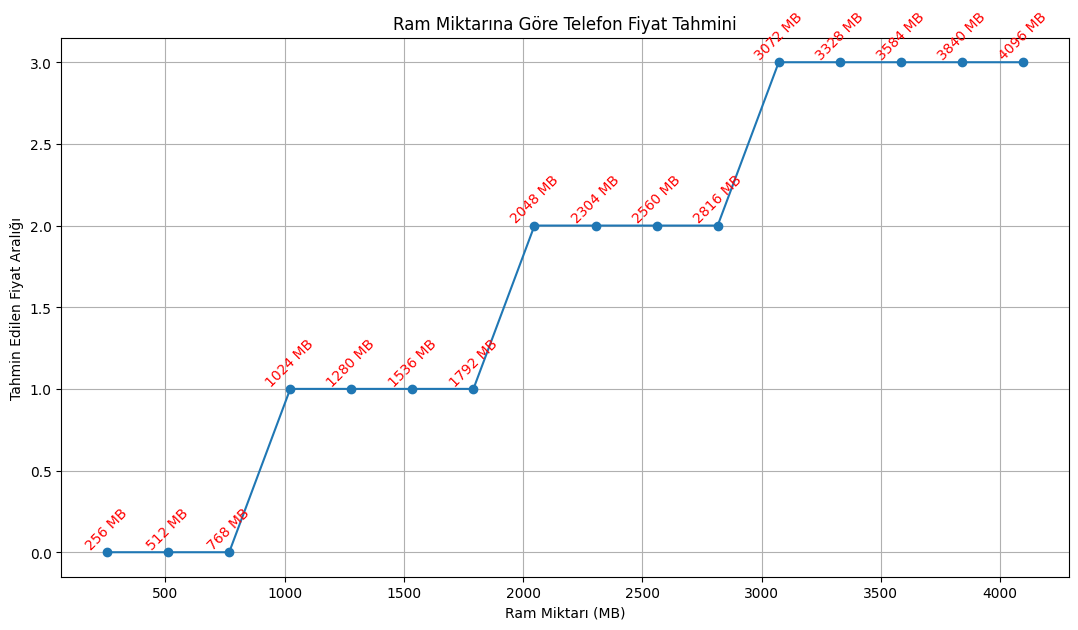

In [274]:
plt.figure(figsize=(13, 7))
plt.plot(ram_miktarlari, tahminEdilenFiyatListesi, marker='o')

for i, yazı in enumerate(ram_miktarlari):
    plt.text(ram_miktarlari[i], tahminEdilenFiyatListesi[i], f'{yazı} MB', ha='center', va='bottom', rotation=45, fontsize=10, color='red')

plt.xlabel('Ram Miktarı (MB)')
plt.ylabel('Tahmin Edilen Fiyat Aralığı')
plt.title('Ram Miktarına Göre Telefon Fiyat Tahmini')
plt.grid(True)
plt.show()

#**10. İşlemci Çekirdek Sayısı ve Ramin fiyat skalasi uzerindeki etkisi**

---



In [275]:
#5 - İşlemci Çekirdek Sayısı ve Ram'in fiyat üzerindeki etkisi

In [276]:
df = pd.read_csv('telefon_fiyatlari.csv')

In [277]:
planlananTelefon = pd.read_excel('planlanantelefon.xlsx')

In [278]:
X = df.drop(columns='price_range').values
Y = df['price_range'].values

In [279]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [280]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [281]:
SVM = SVC(C=100 , kernel = 'linear')
SVM.fit(x_train,y_train)
y_pred = SVM.predict(x_test)

In [282]:
cekirdek_sayilari = np.arange(1, 9)
ram_miktarlari = np.arange(256, 4097, 256)

tahminEdilenFiyatListesi = []

In [283]:
for cekirdek in cekirdek_sayilari:
    for ram in ram_miktarlari:
        planlananTelefon['n_cores'] = cekirdek
        planlananTelefon['ram'] = ram

        normalize = planlananTelefon.values
        normalize = scaler.transform(normalize)

        tahmin = SVM.predict(normalize)
        tahminEdilenFiyatListesi.append(tahmin[0])

<ipython-input-284-7aba8669f6a1>:10: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(data=df_plot, x='Cekirdek', y='RAM', hue='FiyatAraligi', palette=renkPaleti, s=100)


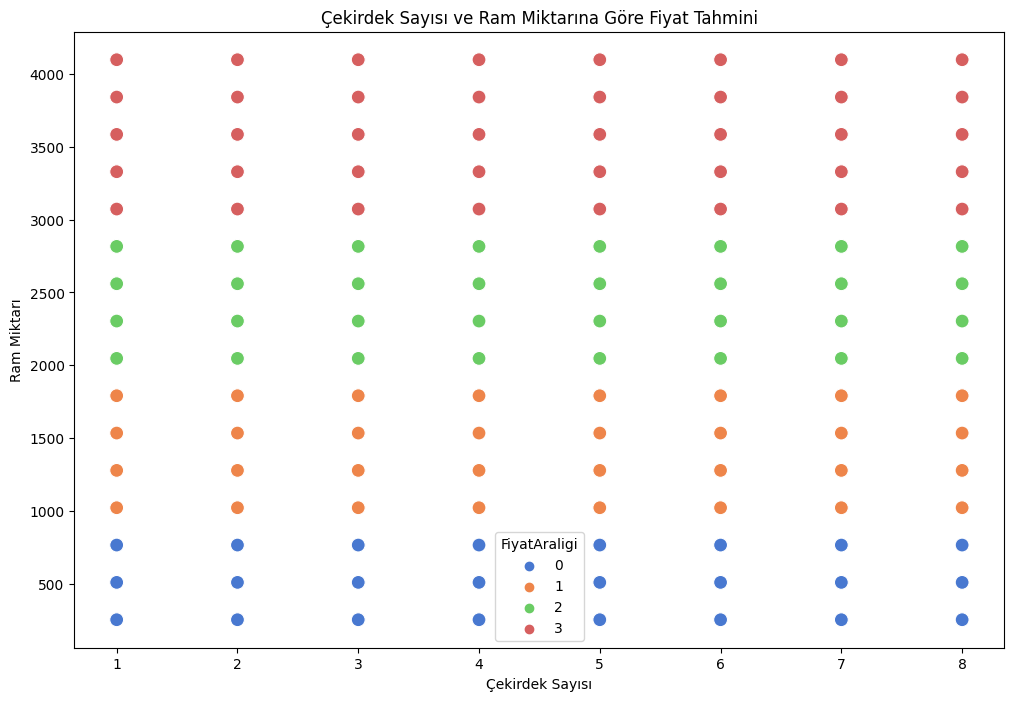

In [284]:
df_plot = pd.DataFrame({
    'Cekirdek': np.repeat(cekirdek_sayilari, len(ram_miktarlari)),
    'RAM': np.tile(ram_miktarlari, len(cekirdek_sayilari)),
    'FiyatAraligi': tahminEdilenFiyatListesi
})

renkPaleti = sns.color_palette("muted", as_cmap=True)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_plot, x='Cekirdek', y='RAM', hue='FiyatAraligi', palette=renkPaleti, s=100)
plt.title('Çekirdek Sayısı ve Ram Miktarına Göre Fiyat Tahmini')
plt.xlabel('Çekirdek Sayısı')
plt.ylabel('Ram Miktarı')
plt.show()